In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

In [3]:
data = pd.read_csv('mycsv_combination1.csv')

In [4]:
data.head()

,filename,zcr_mean,zcr_std,spectral_centroid,mean_spectral_rolloff,std_spectral_rolloff,spectral_bandwidth,chroma_deviation_mean,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,blues.00000_1.wav,0.078317,0.013519,1782.622682,3845.075667,912.603923,2020.556328,0.342053,-125.188171,120.222138,...,9.301556,-4.159669,7.119120,-5.663028,0.530103,-2.870996,0.306077,-2.700369,2.370232,blues
1,blues.00000_2.wav,0.079108,0.015145,1803.133844,3903.829836,1059.169428,2043.208033,0.366391,-104.649918,122.307770,...,10.479907,-4.333720,5.224412,-6.193036,0.677548,-0.946113,-0.170836,-2.291198,1.508931,blues
2,blues.00000_3.wav,0.085122,0.017463,1767.406536,3672.610197,846.426471,1944.426261,0.341613,-112.962753,125.089889,...,8.887646,-4.576091,6.926960,-5.516427,2.762216,-2.871219,0.118136,-3.230836,0.995681,blues
3,blues.00001_1.wav,0.054409,0.028735,1364.273766,2976.303348,1565.934901,1842.030467,0.358000,-221.931198,131.147629,...,6.931743,-1.881995,4.951429,-4.531081,-0.463962,0.497853,0.039326,-1.083576,-0.112309,blues
4,blues.00001_2.wav,0.051896,0.017981,1581.277785,3786.371459,1798.029729,2125.234003,0.346125,-222.168320,124.332985,...,9.272532,-3.031386,3.856776,-7.838705,4.567084,0.114600,-0.367247,-2.646990,1.118412,blues


In [5]:
data[data['genre']=='country'][0:10]

,filename,zcr_mean,zcr_std,spectral_centroid,mean_spectral_rolloff,std_spectral_rolloff,spectral_bandwidth,chroma_deviation_mean,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
600,country.00000_1.wav,0.080519,0.017473,2819.800049,6448.619784,1570.999600,2925.729118,0.370986,-43.021893,67.550041,...,2.061060,-5.234131,5.801379,-2.821017,-4.420733,-2.597391,-0.229270,-2.795935,2.108862,country
601,country.00000_2.wav,0.112371,0.032983,2749.132774,5912.712816,1211.464210,2753.587325,0.382176,-15.715791,71.201767,...,0.903474,-3.268460,4.529911,1.296606,1.485304,1.255232,4.404094,3.992464,4.719677,country
602,country.00000_3.wav,0.121288,0.014552,2820.340164,6289.943559,1160.858748,2862.307242,0.400083,-10.689507,72.129890,...,3.319655,-1.588233,5.109632,1.041479,4.094818,3.135822,7.915074,1.599272,5.473392,country
603,country.00001_1.wav,0.127026,0.016523,2909.443994,6163.117489,909.170387,2804.870729,0.419803,-7.132031,63.992458,...,7.701502,2.521705,1.748470,1.686096,1.870440,-5.453578,-0.006098,-2.043387,1.861921,country
604,country.00001_2.wav,0.120898,0.015286,2917.085944,6153.100303,911.086520,2805.295499,0.411122,-6.359461,63.009571,...,7.395860,-1.507475,-1.988605,1.198390,4.748946,-1.280202,3.322682,-1.133800,1.177961,country
605,country.00001_3.wav,0.124084,0.013995,2987.075736,6520.163976,362.685352,2908.563397,0.416814,-10.391706,61.187374,...,4.535053,1.148615,-5.143793,-0.341865,2.360657,-1.525513,5.171364,-2.063982,-0.144985,country
606,country.00002_1.wav,0.086243,0.028833,2508.011843,5545.549220,1451.109348,2718.020611,0.302205,-115.894852,75.680191,...,1.001812,-8.605026,0.985488,-1.572381,-0.210791,-5.103870,0.236772,-6.950533,0.253880,country
607,country.00002_2.wav,0.057652,0.018420,1979.110035,4375.686766,872.809537,2413.441874,0.295375,-131.029678,88.085396,...,-0.393426,-5.103136,0.922178,-2.032236,0.167929,-4.039874,-0.781462,-1.881397,-4.208170,country
608,country.00002_3.wav,0.073599,0.019627,2434.413961,5647.070029,1204.413849,2723.289350,0.291851,-115.183945,74.203369,...,0.209543,-6.401222,2.996181,-1.626749,-1.976313,-5.391642,-0.296836,-7.303443,-1.806602,country
609,country.00003_1.wav,0.102017,0.027740,2074.056455,4132.376559,1457.463435,2223.621100,0.354914,-62.617123,100.064446,...,0.655703,1.915242,-1.470602,2.306845,5.743078,-3.093472,1.697398,-3.177227,-4.288508,country


In [180]:
#All 10 genres
dataset = data[data['genre'].isin(['jazz', 'classical', 'blues', 'country', 'hiphop','disco','metal','pop','reggae','rock'])].drop(['filename'],axis=1)
dataset.shape

(2997, 28)

In [228]:
#All 10 genres
dataset = data[data['genre'].isin(['jazz', 'classical', 'blues', 'country', 'hiphop','pop'])].drop(['filename'],axis=1)
dataset.shape

(1797, 28)

In [3]:
#Combination 1
dataset = data[data['genre'].isin(['jazz', 'classical', 'blues', 'country', 'hiphop'])].drop(['filename'],axis=1)
dataset.shape

(1497, 28)

In [212]:
#Combination 2
dataset = data[data['genre'].isin(['jazz', 'pop', 'blues', 'country', 'hiphop'])].drop(['filename'],axis=1)
dataset.shape

(1497, 28)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

In [5]:
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
print(y)
y.shape

[0 0 0 ... 4 4 4]


(1497,)

In [6]:
x = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
print(x)
x.shape

[[-0.13251554 -0.65307387 -0.11453394 ...  0.0785806  -0.12563547
   0.89747518]
 [-0.11010468 -0.52101132 -0.08376836 ... -0.02468127 -0.03258611
   0.71636755]
 [ 0.06034908 -0.33271923 -0.13735729 ...  0.03788734 -0.24626846
   0.60844543]
 ...
 [-0.78505779 -0.79541251 -0.43956275 ... -0.5750611   0.44041709
  -0.84992208]
 [-1.07591588 -0.8484125  -0.37335638 ...  0.55097387  1.96987773
   0.80618627]
 [-1.36409004 -1.09403467 -0.83802076 ... -0.69249166  0.2382555
  -0.11562557]]


(1497, 27)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1197, 27) (1197,)
Test set: (300, 27) (300,)


In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [37]:
model = RandomForestClassifier(n_estimators=400, max_depth=60)
model.fit(x_train, y_train)
print("Random Forest's Accuracy: %.3f" % model.score(x_test,y_test))

Random Forest's Accuracy: 0.890


In [20]:
model = RandomForestClassifier(n_estimators=200) #n_estimators = No. of decision trees
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8866666666666667

In [21]:
model = RandomForestClassifier(criterion="gini", max_depth = 10)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.87

In [22]:
y_pred = model.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.870


In [23]:
from sklearn import metrics
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Random Forest's Accuracy:  0.87


In [38]:
y_predicted = model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        56
           1       0.92      0.98      0.95        59
           2       0.82      0.87      0.85        54
           3       0.94      0.86      0.90        71
           4       0.86      0.83      0.85        60

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [17]:
#Confusion matrix between tested(true) values and predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[50,  1,  1,  0,  4],
       [ 0, 57,  0,  0,  2],
       [ 3,  1, 45,  2,  3],
       [ 1,  1,  8, 60,  1],
       [ 4,  5,  6,  2, 43]], dtype=int64)

Text(33.0, 0.5, 'Truth')

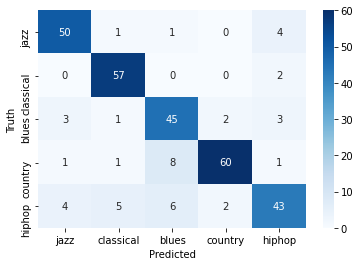

In [40]:
#HeatMap for Combination1
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
classes=['jazz', 'classical', 'blues', 'country', 'hiphop']
sn.heatmap(cm, annot=True,cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

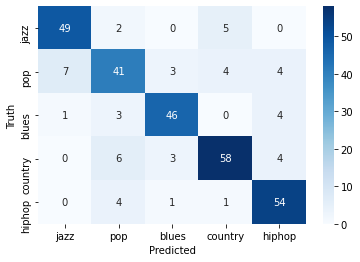

In [227]:
#HeatMap for Combination2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
classes=['jazz', 'pop', 'blues', 'country', 'hiphop']
sn.heatmap(cm, annot=True,cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')